# Tugas Besar

## Miftah Shidqi Rabbani - 1301184371
## Muhammad Tegar Zharfan Humam Setiabakti - 1301184354

In [2]:
#Library yang akan digunakan
import pandas as pd
import sklearn
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import time

In [3]:
#Import dataset yang akan digunakan
data_cuaca = pd.read_csv('weatherAUS.csv')
data_cuaca

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Data Exploration
* Mencari dan menghapus missing value

In [4]:
data_cuaca.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [5]:
data_cuaca.dropna(inplace=True)

In [6]:
data_cuaca.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
#Melihat statistical summary dari tiap atribut (bertipe numerik)
data_cuaca.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


### Data Cleaning
* Mencari dan menghapus data outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x225a31c7190>,
 'caps': [<matplotlib.lines.Line2D at 0x225a31c7880>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a31b0df0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a31c7f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a31d02e0>],
 'means': []}

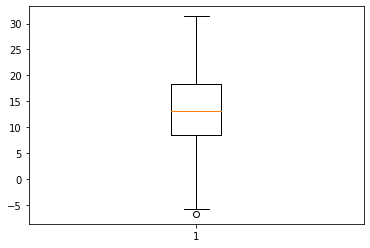

In [8]:
plt.boxplot(data_cuaca["MinTemp"])

In [9]:
#Terdapat banyak data outlier dibawah -2
data_cuaca.drop(data_cuaca[data_cuaca.MinTemp <= -2].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a32b67f0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a32b6eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a32b6490>],
 'medians': [<matplotlib.lines.Line2D at 0x225a32c35b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a32c3910>],
 'means': []}

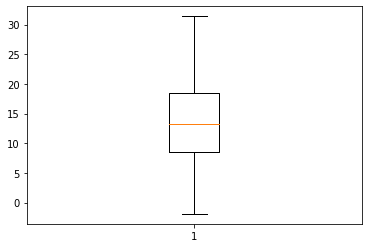

In [10]:
plt.boxplot(data_cuaca["MinTemp"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a331a670>,
 'caps': [<matplotlib.lines.Line2D at 0x225a331ad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a331a310>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3327430>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3327790>],
 'means': []}

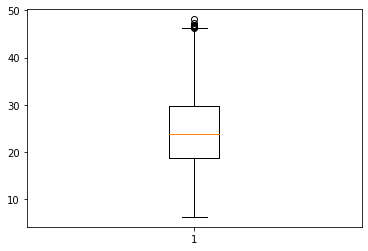

In [11]:
plt.boxplot(data_cuaca["MaxTemp"])

In [12]:
#Terdapat banyak data outlier di atas 40
data_cuaca.drop(data_cuaca[data_cuaca.MaxTemp >= 40].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3374160>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3374820>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3366dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3374ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3380280>],
 'means': []}

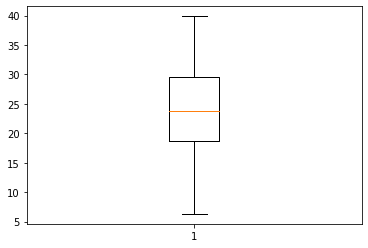

In [13]:
plt.boxplot(data_cuaca["MaxTemp"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a33d0070>,
 'caps': [<matplotlib.lines.Line2D at 0x225a33d0730>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a33c3cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a33d0df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a33db1c0>],
 'means': []}

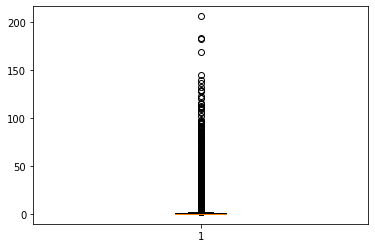

In [14]:
plt.boxplot(data_cuaca["Rainfall"])

In [15]:
#Terdapat banyak data outlier di atas 0.1
data_cuaca.drop(data_cuaca[data_cuaca.Rainfall >= 0.1].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a334a610>,
 'caps': [<matplotlib.lines.Line2D at 0x225a32e08e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3161190>],
 'medians': [<matplotlib.lines.Line2D at 0x225a32e07c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a32e8d60>],
 'means': []}

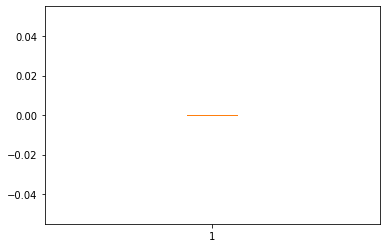

In [16]:
plt.boxplot(data_cuaca["Rainfall"])

In [17]:
#karena aribut Rainfall tidak memiliki nilai, maka tidak perlu digunakan lagi
data_cuaca.drop('Rainfall', inplace=True, axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a34202b0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3420970>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3411f10>],
 'medians': [<matplotlib.lines.Line2D at 0x225a342b070>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a342b3d0>],
 'means': []}

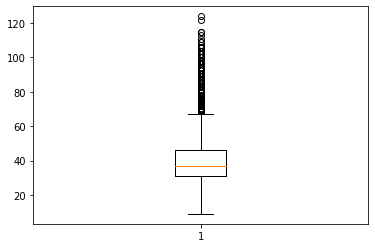

In [18]:
plt.boxplot(data_cuaca["WindGustSpeed"])

In [19]:
#Terdapat banyak data outlier di atas 55
data_cuaca.drop(data_cuaca[data_cuaca.WindGustSpeed >= 55].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3471550>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3471c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a34711f0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a347b310>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a347b670>],
 'means': []}

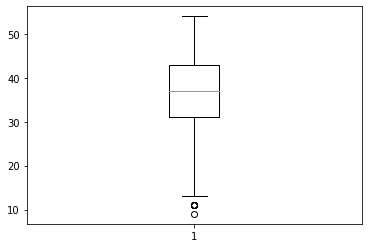

In [20]:
plt.boxplot(data_cuaca["WindGustSpeed"])

In [21]:
#Terdapat banyak data outlier dibawah 15
data_cuaca.drop(data_cuaca[data_cuaca.WindGustSpeed <= 15].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a34cf0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a34cf790>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a34bed30>],
 'medians': [<matplotlib.lines.Line2D at 0x225a34cfe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a34da1f0>],
 'means': []}

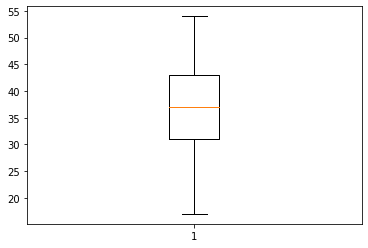

In [22]:
plt.boxplot(data_cuaca["WindGustSpeed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3533040>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3533700>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3525ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3533dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3541160>],
 'means': []}

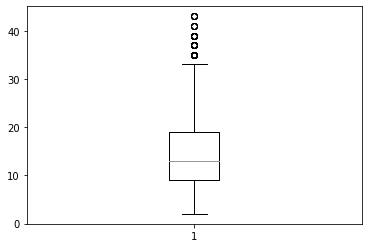

In [23]:
plt.boxplot(data_cuaca["WindSpeed9am"])

In [24]:
#Terdapat banyak data outlier di atas 30
data_cuaca.drop(data_cuaca[data_cuaca.WindSpeed9am >= 30].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a364faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a365f1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a364f790>],
 'medians': [<matplotlib.lines.Line2D at 0x225a365f8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a365fc10>],
 'means': []}

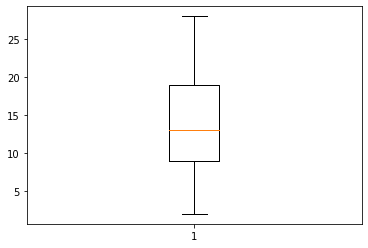

In [25]:
plt.boxplot(data_cuaca["WindSpeed9am"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a36af730>,
 'caps': [<matplotlib.lines.Line2D at 0x225a36afdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a36af310>],
 'medians': [<matplotlib.lines.Line2D at 0x225a36be4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a36be850>],
 'means': []}

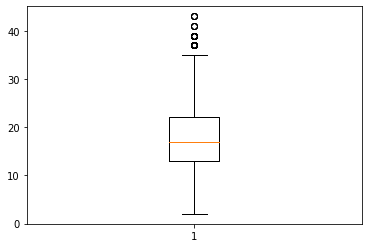

In [26]:
plt.boxplot(data_cuaca["WindSpeed3pm"])

In [27]:
#Terdapat banyak data outlier di atas 33
data_cuaca.drop(data_cuaca[data_cuaca.WindSpeed3pm >= 33].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a370f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a370f8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a36ffe50>],
 'medians': [<matplotlib.lines.Line2D at 0x225a370ff70>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a371a310>],
 'means': []}

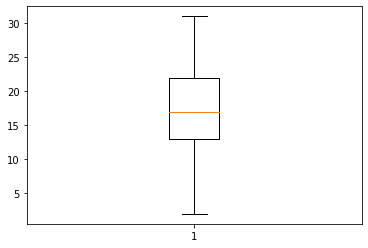

In [28]:
plt.boxplot(data_cuaca["WindSpeed3pm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a37ba460>,
 'caps': [<matplotlib.lines.Line2D at 0x225a37bab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a37ba040>],
 'medians': [<matplotlib.lines.Line2D at 0x225a37c4220>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a37c4580>],
 'means': []}

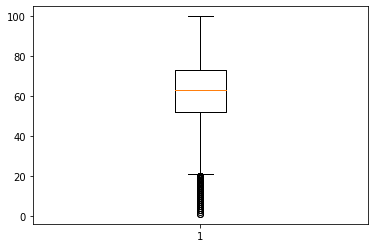

In [29]:
plt.boxplot(data_cuaca["Humidity9am"])

In [30]:
#Terdapat banyak data outlier di dibawah 30
data_cuaca.drop(data_cuaca[data_cuaca.Humidity9am <= 30].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3814580>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3814c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3814220>],
 'medians': [<matplotlib.lines.Line2D at 0x225a381d340>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a381d6a0>],
 'means': []}

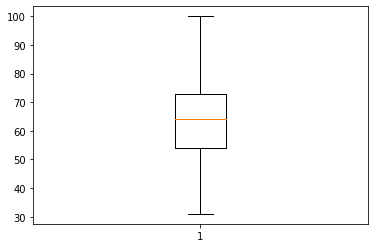

In [31]:
plt.boxplot(data_cuaca["Humidity9am"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3870370>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3870a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a384a880>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3880100>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3880430>],
 'means': []}

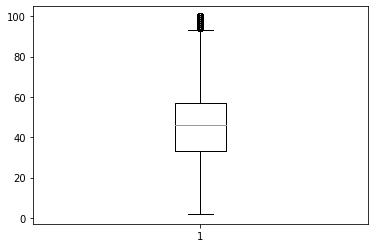

In [32]:
plt.boxplot(data_cuaca["Humidity3pm"])

In [33]:
#Terdapat banyak data outlier di atas 90
data_cuaca.drop(data_cuaca[data_cuaca.Humidity3pm >= 90].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a38c6b50>,
 'caps': [<matplotlib.lines.Line2D at 0x225a38d5250>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a38c67c0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a38d58b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a38d5be0>],
 'means': []}

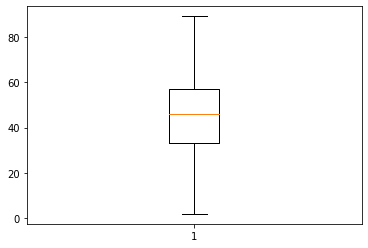

In [34]:
plt.boxplot(data_cuaca["Humidity3pm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a391af70>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3929670>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a391ac70>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3929d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3937070>],
 'means': []}

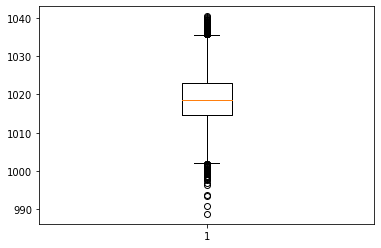

In [35]:
plt.boxplot(data_cuaca["Pressure9am"])

In [36]:
#Terdapat banyak data outlier di atas 1020 dan di bawah 1006
data_cuaca.drop(data_cuaca[data_cuaca.Pressure9am >= 1020].index, inplace=True)
data_cuaca.drop(data_cuaca[data_cuaca.Pressure9am <= 1006].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3ef6760>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3ef6e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3ef6460>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3f004f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3f00820>],
 'means': []}

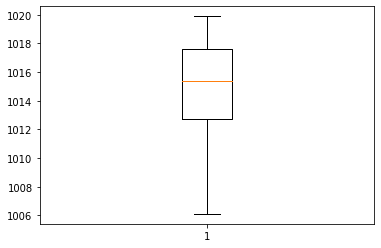

In [37]:
plt.boxplot(data_cuaca["Pressure9am"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a34a6be0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a34e5280>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a34a66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a343abb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a34e82e0>],
 'means': []}

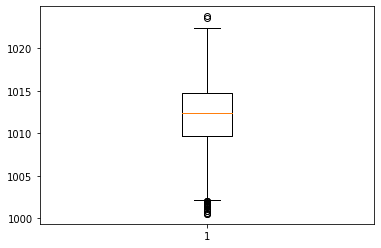

In [38]:
plt.boxplot(data_cuaca["Pressure3pm"])

In [39]:
#Terdapat banyak data outlier di atas 1020 dan di bawah 1004
data_cuaca.drop(data_cuaca[data_cuaca.Pressure3pm >= 1020].index, inplace=True)
data_cuaca.drop(data_cuaca[data_cuaca.Pressure3pm <= 1006].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a354eac0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a338da60>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a354ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x225a373f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a36276d0>],
 'means': []}

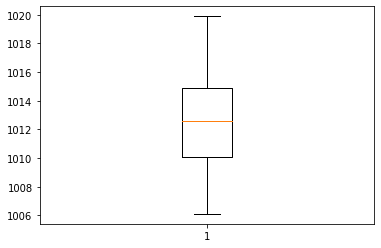

In [40]:
plt.boxplot(data_cuaca["Pressure3pm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3c39be0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3c482e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3c398e0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3c489a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3c48d00>],
 'means': []}

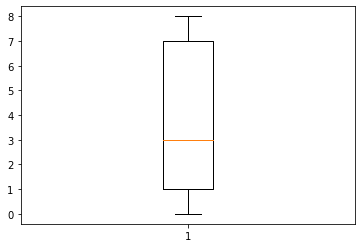

In [41]:
plt.boxplot(data_cuaca["Cloud9am"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3ca81f0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3ca88b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3c9ae50>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3ca8f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3cb4310>],
 'means': []}

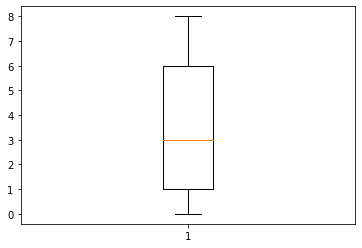

In [42]:
plt.boxplot(data_cuaca["Cloud3pm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3d09760>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3d09e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3d09400>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3d14520>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3d14880>],
 'means': []}

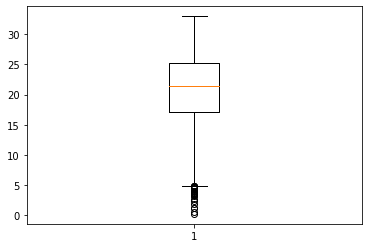

In [43]:
## Temp9am 	Temp3pm
plt.boxplot(data_cuaca["Temp9am"])

In [44]:
#Terdapat banyak data outlier di bawah 7
data_cuaca.drop(data_cuaca[data_cuaca.Temp9am <= 7].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3d61e50>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3d6f4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3d61af0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3d6fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3d6ff10>],
 'means': []}

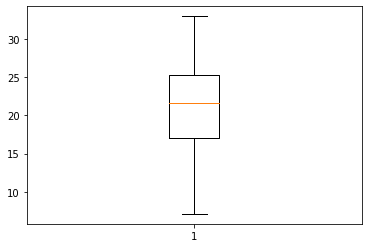

In [45]:
plt.boxplot(data_cuaca["Temp9am"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3a11a00>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3a20100>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3a11670>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3a207c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3a20b20>],
 'means': []}

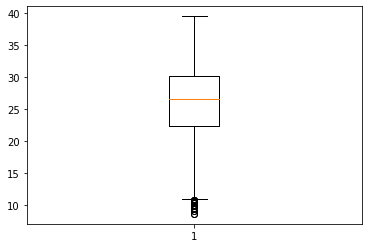

In [46]:
plt.boxplot(data_cuaca["Temp3pm"])

In [47]:
#Terdapat banyak data outlier di bawah 13
data_cuaca.drop(data_cuaca[data_cuaca.Temp3pm <= 13].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3a783d0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3a78a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3a78070>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3a83190>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3a834f0>],
 'means': []}

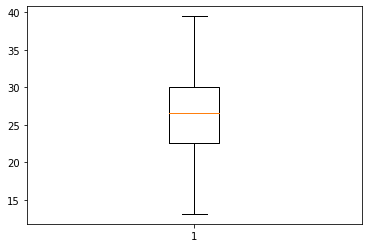

In [48]:
plt.boxplot(data_cuaca["Temp3pm"])

In [49]:
data_cuaca

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6053,2009-01-05,Cobar,21.9,38.4,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6056,2009-01-08,Cobar,23.3,34.0,9.8,12.6,SSW,41.0,S,SSE,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No
6061,2009-01-13,Cobar,23.9,39.1,13.8,12.1,ENE,39.0,NE,N,...,40.0,15.0,1013.6,1010.4,0.0,2.0,29.1,37.0,No,No
6067,2009-01-19,Cobar,21.4,37.5,14.8,6.9,NNE,43.0,ENE,NNE,...,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,No,Yes
6069,2009-01-21,Cobar,25.4,33.5,13.6,3.7,N,46.0,NW,N,...,46.0,52.0,1012.0,1009.8,4.0,7.0,28.9,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,6.2,10.6,ESE,26.0,SE,NNW,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


### Feature Engineering
* Categorical Encoding : mengubah data kategorial menjadi data numerik

In [50]:
# cek variable yang akan diubah data kategorial menjadi data numerik

print(data_cuaca.WindGustDir.unique())
print(data_cuaca.WindDir9am.unique())
print(data_cuaca.WindDir3pm.unique())
print(data_cuaca.RainToday.unique())
print(data_cuaca.RainTomorrow.unique())

['WNW' 'SSW' 'ENE' 'NNE' 'N' 'S' 'E' 'ESE' 'SW' 'SSE' 'NE' 'WSW' 'SE'
 'NNW' 'NW' 'W']
['WNW' 'S' 'NE' 'ENE' 'NW' 'NNE' 'SSW' 'E' 'WSW' 'N' 'SW' 'ESE' 'SSE' 'SE'
 'W' 'NNW']
['WSW' 'SSE' 'N' 'NNE' 'E' 'ESE' 'ENE' 'NE' 'S' 'SE' 'SSW' 'NNW' 'WNW'
 'NW' 'SW' 'W']
['No']
['No' 'Yes']


In [51]:
data_num = {"WindGustDir" : {"W": 0,"WNW": 1,"NW": 2,"NNW": 3,"N": 4,"NNE": 5,"NE": 6,"ENE": 7,
                            "E": 8,"ESE": 9,"SE": 10,"SSE": 11,"S": 12,"SSW": 13,"SW": 14,"WSW": 15},
            "WindDir9am"  : {"W": 0,"WNW": 1,"NW": 2,"NNW": 3,"N": 4,"NNE": 5,"NE": 6,"ENE": 7,
                            "E": 8,"ESE": 9,"SE": 10,"SSE": 11,"S": 12,"SSW": 13,"SW": 14,"WSW": 15},
            "WindDir3pm"  : {"W": 0,"WNW": 1,"NW": 2,"NNW": 3,"N": 4,"NNE": 5,"NE": 6,"ENE": 7,
                            "E": 8,"ESE": 9,"SE": 10,"SSE": 11,"S": 12,"SSW": 13,"SW": 14,"WSW": 15},
            "RainToday"   : {"Yes": 1, "No": 0}, 
            "RainTomorrow": {"Yes": 1, "No": 0}}
data_cuaca = data_cuaca.replace(data_num)

In [52]:
data_cuaca[['WindGustDir','WindDir9am','WindDir3pm', 'RainToday','RainTomorrow']]

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6053,1,1,15,0,0
6056,13,12,11,0,0
6061,7,6,4,0,0
6067,5,7,5,0,1
6069,4,2,4,0,0
...,...,...,...,...,...
142298,7,10,6,0,0
142299,8,10,10,0,0
142300,8,8,0,0,0
142301,9,10,3,0,0


* Mencari dan menghapus data outlier dari atribut bertipe kategorial

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3ae0700>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3ae0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3ae03a0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3aeb4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3aeb820>],
 'means': []}

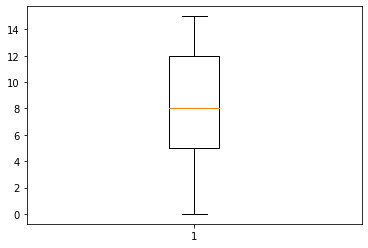

In [53]:
plt.boxplot(data_cuaca["WindGustDir"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3b39be0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3b462e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3b39880>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3b469a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3b46d00>],
 'means': []}

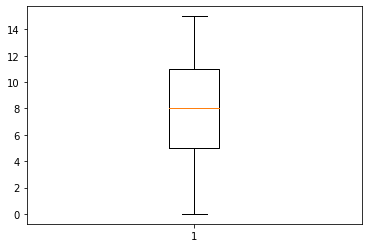

In [54]:
plt.boxplot(data_cuaca["WindDir9am"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3d81ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3d92610>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3b83b80>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3d92c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3d92fa0>],
 'means': []}

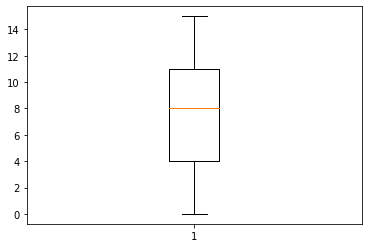

In [55]:
plt.boxplot(data_cuaca["WindDir3pm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3df3160>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3df3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3de2e20>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3df3ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3dfe280>],
 'means': []}

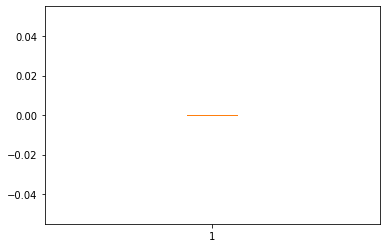

In [56]:
plt.boxplot(data_cuaca["RainToday"])

{'whiskers': [<matplotlib.lines.Line2D at 0x225a3e45640>,
 'caps': [<matplotlib.lines.Line2D at 0x225a3e45d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x225a3a9d9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x225a3e533d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225a3e53700>],
 'means': []}

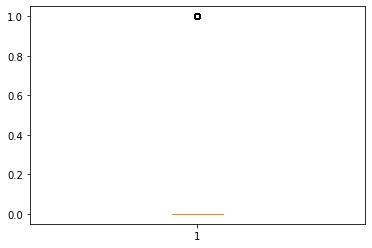

In [57]:
plt.boxplot(data_cuaca["RainTomorrow"])

In [58]:
# Mengecek kembali missing value
data_cuaca.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [60]:
data_cuaca

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6053,2009-01-05,Cobar,21.9,38.4,11.4,12.2,1,31.0,1,15,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6056,2009-01-08,Cobar,23.3,34.0,9.8,12.6,13,41.0,12,11,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0
6061,2009-01-13,Cobar,23.9,39.1,13.8,12.1,7,39.0,6,4,...,40.0,15.0,1013.6,1010.4,0.0,2.0,29.1,37.0,0,0
6067,2009-01-19,Cobar,21.4,37.5,14.8,6.9,5,43.0,7,5,...,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,0,1
6069,2009-01-21,Cobar,25.4,33.5,13.6,3.7,4,46.0,2,4,...,46.0,52.0,1012.0,1009.8,4.0,7.0,28.9,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,6.0,11.0,7,35.0,10,6,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,Darwin,21.2,32.6,7.6,8.6,8,37.0,10,10,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,Darwin,20.7,32.8,5.6,11.0,8,33.0,8,0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,Darwin,19.5,31.8,6.2,10.6,9,26.0,10,3,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [71]:
# Cek jumlah tiap kategori di label RainToday
a = data_cuaca["RainToday"]
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 15196}

In [61]:
# Cek jumlah tiap kategori di label RainTomorrow
a = data_cuaca["RainTomorrow"]
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 13361, 1: 1835}

In [63]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

#Feature and Target
Feature = data_cuaca.iloc[:,[2,3,4,5,6,7,8,9,19,11,12,13,14,15,16,17,18,19]].values
Target_Today = data_cuaca.iloc[:,20].values
Target_Tomorrow = data_cuaca.iloc[:,21].values

#Data Scaling
min_max_scaler = preprocessing.MinMaxScaler()
Feature = min_max_scaler.fit_transform(Feature)

#tpot1
tpot1 = TPOTClassifier(generations=5, population_size=20, verbosity=2, cv=5, n_jobs=-2)

# define model evaluation using stratisfied kfold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#tpot2
tpot2 = TPOTClassifier(generations=5, population_size=20, verbosity=2, cv=cv, n_jobs=-2)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


TPOT using 5-Fold Cross Validation

In [64]:
#Modelling label RainToday

#Data Splitting
training_features, testing_features, training_target, testing_target = train_test_split(Feature, Target_Today, train_size=0.75, test_size=0.25)
print(training_features.size, training_target.size)

tic = time.perf_counter()
#Data Training Using TPOT
tpot1.fit(training_features, training_target)

#Scoring
tpot1.score(testing_features, testing_target)
toc = time.perf_counter()
print(f" Modelling and Scoring time in {toc - tic:0.4f} seconds")

205146 11397

Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0
                                                                              
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=1, p=1, weights=distance)
 Modelling and Scoring time in 88.6945 seconds


In [65]:
#Modelling label RainTomorrow

#Data Splitting
training_features, testing_features, training_target, testing_target = train_test_split(Feature, Target_Tomorrow, train_size=0.75, test_size=0.25)
print(training_features.size, training_target.size)

tic = time.perf_counter()
#Data Training Using TPOT
tpot1.fit(training_features, training_target)

#Scoring
tpot1.score(testing_features, testing_target)
toc = time.perf_counter()
print(f" Modelling and Scoring time in {toc - tic:0.4f} seconds")

205146 11397

Generation 1 - Current best internal CV score: 0.8983071214675565

Generation 2 - Current best internal CV score: 0.898394763785286

Generation 3 - Current best internal CV score: 0.898394763785286

Generation 4 - Current best internal CV score: 0.898658345072862

Generation 5 - Current best internal CV score: 0.898658345072862

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
 Modelling and Scoring time in 292.9870 seconds


TPOT using Repeated Stratified KFold

In [66]:
#Modelling label RainToday

#Data Splitting
training_features, testing_features, training_target, testing_target = train_test_split(Feature, Target_Today, train_size=0.75, test_size=0.25)
print(training_features.size, training_target.size)

tic = time.perf_counter()
#Data Training Using TPOT
tpot2.fit(training_features, training_target)

#Scoring
tpot2.score(testing_features, testing_target)

toc = time.perf_counter()
print(f" Modelling and Scoring time in {toc - tic:0.4f} seconds")

205146 11397

Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=4, min_child_weight=18, n_estimators=100, n_jobs=1, subsample=0.05, verbosity=0)
 Modelling and Scoring time in 487.5041 seconds


In [67]:
#Modelling label RainTomorrow

#Data Splitting
training_features, testing_features, training_target, testing_target = train_test_split(Feature, Target_Tomorrow, train_size=0.75, test_size=0.25)
print(training_features.size, training_target.size)

tic = time.perf_counter()
#Data Training Using TPOT
tpot2.fit(training_features, training_target)

#Scoring
tpot2.score(testing_features, testing_target)

toc = time.perf_counter()
print(f" Modelling and Scoring time in {toc - tic:0.4f} seconds")

205146 11397

Generation 1 - Current best internal CV score: 0.8934519096981554

Generation 2 - Current best internal CV score: 0.8938610610518101

Generation 3 - Current best internal CV score: 0.8938610610518101

Generation 4 - Current best internal CV score: 0.893890300817892

Generation 5 - Current best internal CV score: 0.893890300817892

Best pipeline: ExtraTreesClassifier(LinearSVC(input_matrix, C=10.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.01), bootstrap=True, criterion=entropy, max_features=0.5, min_samples_leaf=16, min_samples_split=4, n_estimators=100)
 Modelling and Scoring time in 1153.5558 seconds


Export dataset

In [70]:
#export dataset hasil explorasi
data_cuaca.to_csv (r'dataset_hasil_eksplorasi.csv', index = False, header=True)